In [5]:
from Functions import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('data/TweetsOriginal.csv', encoding = 'ISO-8859-1')
x_train, x_test, y_train, y_test = clean_split(2, df)
print(x_train.shape, x_test.shape) 
print(y_train.shape, y_test.shape)

Original Value Counts
1.0    2978
0.0     570
Name: Emotion_New, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Final Resampled Value Counts
1.0    600
0.0    570
Name: Emotion_New, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Finished Pickling
(994, 4651) (176, 4651)
(994,) (176,)


In [7]:
test_df = pd.read_csv('data/TrainDF.csv')

print(test_df.sum().max())

510.0


In [8]:
for i in test_df.columns: 
    print(i)

abacu damn
abandon realiti
abl get
abuzz possibl
accord mention
account interfac
account tri
acerb cynic
achiev success
acknowledg need
acquir last
across room
act like
action downtown
action link
action peopl
action quot
action thi
activ cellular
actual said
actual take
ad android
ad buy
ad clean
ad quot
ad think
add appl
add user
addit place
address concert
admit appl
adopt locat
advisori board
aesthet appl
afternoon appl
age domain
age higher
agre appl
agre novelti
ah good
ahead also
aim bring
airplan mode
airport peopl
al link
alarm also
alarm come
alarm set
album featur
algorithm mean
algorithm skew
aliv game
aliv love
allow open
almost everi
almost good
almost long
alon may
along veri
alreadi alreadi
alreadi android
alreadi batteri
alreadi cover
alreadi even
alreadi got
alreadi halfway
alreadi kind
alreadi mention
alreadi see
alreadi tell
alreadi tri
also ad
also altimet
also appl
also known
also larg
also live
also need
also order
also special
also thank
also want
also whi
also 

quot right
quot roll
quot rout
quot said
quot save
quot search
quot see
quot sell
quot social
quot still
quot store
quot stuff
quot swisher
quot technic
quot tell
quot therebi
quot thi
quot think
quot threw
quot today
quot topic
quot tournament
quot transpar
quot tuxedo
quot vector
quot via
quot vintag
quot wa
quot work
quot worn
quot worst
quot would
quot year
quotabl mention
rad bit
rain first
rais hand
ran mention
randi search
rank panel
rare case
rate get
rate review
rather peopl
ratio like
read appl
read attent
read book
read like
read link
read preview
reader content
reader tweet
readership quot
readi doe
readi go
readi mention
readi quot
readi today
real deal
real estat
real keyboard
real thing
real time
realist twitter
realiti ani
realiz un
realli amaz
realli buggi
realli care
realli cool
realli deficit
realli disappoint
realli dont
realli eleg
realli enjoy
realli excit
realli interest
realli matter
realli need
realli new
realli realli
realli want
realli would
reason go
reason 

In [9]:
from nltk.corpus import stopwords, words
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

CountVectorizer()

CountVectorizer()

### Resampling
- 0 = negative
- 1 = Positive 
- 2 = neutral

### Neural Network

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten 
from keras.layers import Conv1D, GlobalMaxPooling1D, BatchNormalization, Embedding, LSTM
from keras import regularizers
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

Using plaidml.keras.backend backend.


In [18]:
def get_nn_model(x, model_type, act):
    model = Sequential()
    embed_dim = 2500 
    output_dim = 32
    if model_type == 'embedding':
        model.add(Embedding(embed_dim, output_dim, input_length = len(x[0]), trainable = False, name = 'Embed Input'))
        model.add(Flatten())
        model.add(Dense(32, activation = act))
        
    elif model_type == 'normal': 
        model.add(Dense(512, activation = act, input_shape = x[0].shape, name = 'Input'))
        model.add(Dense(512, activation = act))
        model.add(Dense(512, activation = act))

        
    elif model_type == 'cnn': 
        model.add(Embedding(embed_dim, output_dim, input_length = len(x[0]), trainable = False,  name = 'Embed Input'))
        model.add(Conv1D(128, 5, activation = act, ))
        model.add(GlobalMaxPooling1D())
        model.add(Dense(64, activation = act))
    
    elif model_type == 'LSTM': 
        model.add(Embedding(embed_dim, output_dim, input_length = len(x[0]), trainable = False,  name = 'Embed Input'))
        model.add(LSTM(128, activation = act))


    model.add(Dense(1, activation = 'sigmoid', name = 'OutputLayer'))
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model



### Normal Model

In [20]:
#normal
model_type = 'normal'
act = 'relu'
model = get_nn_model(x_train, model_type, act)
print(model.summary())

#cnn
early_stopping = EarlyStopping(monitor='val_loss', verbose = 1, patience=20)
model_checkpoint = ModelCheckpoint(f'../Weights/{model_type.upper()}_{act}-ModelCheckpointWeights.h5', verbose = 1, save_best_only=True,
                                  monitor = 'val_loss')
lr_plat = ReduceLROnPlateau(patience = 2, mode = 'min')

callbacks = [early_stopping, model_checkpoint, lr_plat]
epochs = 100 
batch_size= 32

model_history = model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, 
                         validation_data = (x_test, y_test), callbacks = callbacks)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (Dense)                (None, 512)               2381824   
_________________________________________________________________
dense_9 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
OutputLayer (Dense)          (None, 1)                 513       
Total params: 2,907,649
Trainable params: 2,907,649
Non-trainable params: 0
_________________________________________________________________
None
Train on 994 samples, validate on 176 samples
Epoch 1/100
994/994 [==============================] - 0s 417us/step - loss: 0.6714 - acc: 0.5714 - val_loss: 0.5930 - val_acc: 0.7102

Epoch 00001: val_loss improved from inf to 0.59301, saving model to ../Weight

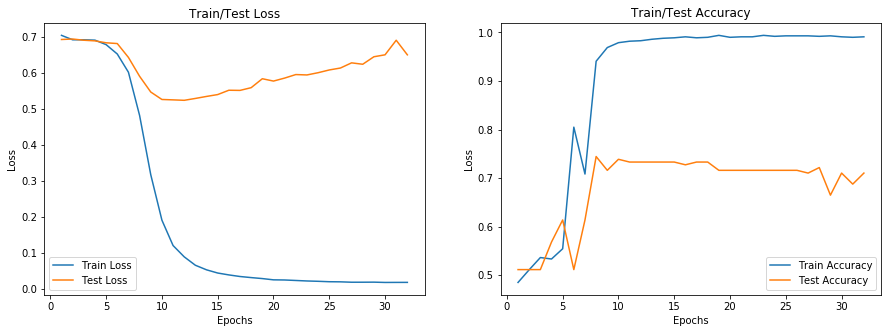

In [13]:
plot_loss(model_history, model_type, act)

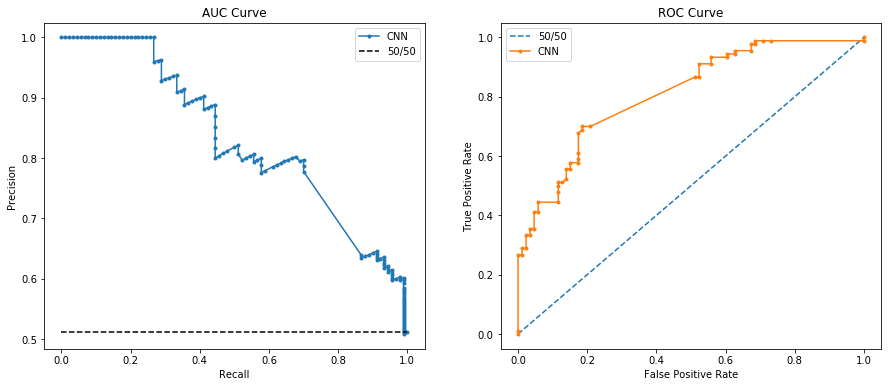

{'F1 Score': 0.712, 'AUC': 0.833, 'ROC': 0.811}


In [14]:
model = get_nn_model(x_train, model_type, act)
model.load_weights(f'../Weights/{model_type.upper()}_{act}-ModelCheckpointWeights.h5')

get_roc_auc(model,model_type, act, x_train, y_train, x_test, y_test)

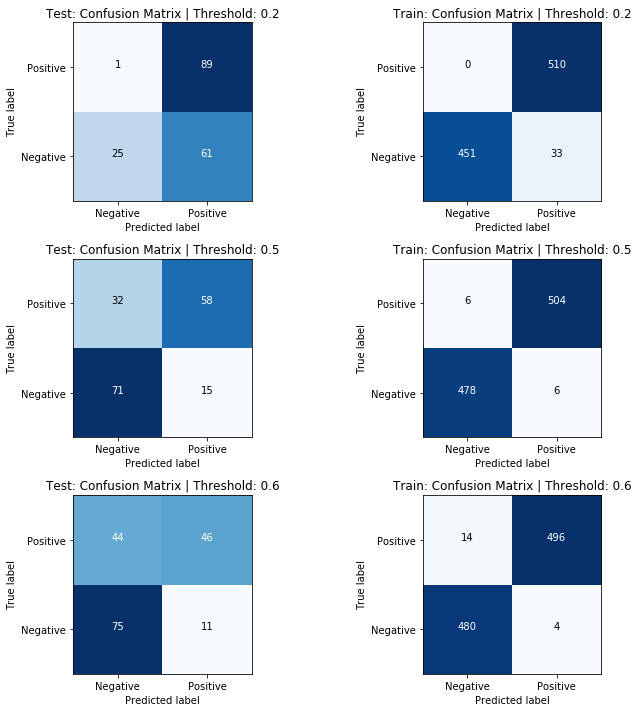

In [15]:
y_test_prob = model.predict(x_test).ravel() 
y_train_prob = model.predict(x_train).ravel() 

plot_cm(y_train = y_train, y_test = y_test, y_train_prob = y_train_prob,
                      y_test_prob = y_test_prob,classes = ['Negative', 'Positive'], thresholds = [.2, .5,.6], 
        model_type = model_type, act = act)

### CNN

In [17]:
#normal
model_type = 'cnn'
act = 'relu'
model = get_nn_model(x_train, model_type, act)
print(model.summary())

#cnn
early_stopping = EarlyStopping(monitor='val_loss', verbose = 1, patience=5)
model_checkpoint = ModelCheckpoint(f'../Weights/{model_type.upper()}_{act}-ModelCheckpointWeights.h5', verbose = 1,
                                   save_best_only=True, monitor = 'val_loss')
lr_plat = ReduceLROnPlateau(patience = 3, mode = 'min')

callbacks = [early_stopping, model_checkpoint]
epochs = 100 
batch_size= 32

model_history = model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, 
                         validation_data = (x_test, y_test), callbacks = callbacks)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Embed Input (Embedding)      (None, 5000, 32)          80000     
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 4996, 128)         20608     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
OutputLayer (Dense)          (None, 1)                 65        
Total params: 108,929
Trainable params: 28,929
Non-trainable params: 80,000
_________________________________________________________________
None
Train on 994 samples, validate on 176 samples
Epoch 1/100
994/994 [==============================] - 50s 50ms/step - loss: 0.69

KeyboardInterrupt: 

In [ ]:
plot_loss(model_history, model_type, act)

In [ ]:
model = get_nn_model(x_train, model_type, act)
model.load_weights(f'../Weights/{model_type.upper()}_{act}-ModelCheckpointWeights.h5')

get_roc_auc(model,model_type, act, x_train, y_train, x_test, y_test)

In [ ]:
y_test_prob = model.predict(x_test).ravel() 
y_train_prob = model.predict(x_train).ravel() 

plot_cm(y_train = y_train, y_test = y_test, y_train_prob = y_train_prob,
                      y_test_prob = y_test_prob,classes = ['Negative', 'Positive'], thresholds = [.2, .5,.6], 
        model_type = model_type, act = act)

### LSTM

In [ ]:
#normal
model_type = 'LSTM'
act = 'relu'
model = get_nn_model(x_train, model_type, act)
print(model.summary())

#cnn
early_stopping = EarlyStopping(monitor='val_loss', verbose = 1, patience=20)
model_checkpoint = ModelCheckpoint(f'../Weights/{model_type.upper()}_{act}-ModelCheckpointWeights.h5', verbose = 1, save_best_only=True,
                                  monitor = 'val_loss')
lr_plat = ReduceLROnPlateau(patience = 3, mode = 'min')

callbacks = [early_stopping, model_checkpoint]
epochs = 100 
batch_size= 32

model_history = model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, 
                         validation_data = (x_test, y_test), callbacks = callbacks)

In [ ]:
assert False

## Embedding

In [7]:
#normal
model_type = 'embedding'
act = 'relu'
model = get_nn_model(x_train, model_type, act)
print(model.summary())

#cnn
early_stopping = EarlyStopping(monitor='val_loss', verbose = 1, patience=20)
model_checkpoint = ModelCheckpoint(f'../Weights/{model_type.upper()}_{act}-ModelCheckpointWeights.h5', verbose = 1, save_best_only=True,
                                  monitor = 'val_loss')
lr_plat = ReduceLROnPlateau(patience = 3, mode = 'min')

callbacks = [early_stopping, model_checkpoint]
epochs = 100 
batch_size= 32

model_history = model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, 
                         validation_data = (x_test, y_test), callbacks = callbacks)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Embed Input (Embedding)      (None, 5000, 32)          80000     
_________________________________________________________________
flatten_2 (Flatten)          (None, 160000)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                5120032   
_________________________________________________________________
OutputLayer (Dense)          (None, 1)                 33        
Total params: 5,200,065
Trainable params: 5,120,065
Non-trainable params: 80,000
_________________________________________________________________
None
Train on 994 samples, validate on 176 samples
Epoch 1/100
994/994 [==============================] - 46s 47ms/step - loss: 0.8022 - acc: 0.4909 - val_loss: 0.6932 - val_acc: 0.4886

Epoch 00001: val_loss improved from inf to 0.69319, saving model to ../W

KeyboardInterrupt: 